In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [13]:
from torchvision import transforms
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
train_dir = image_path / "train"
test_dir = image_path / "test"
data_transform = transforms.Compose([transforms.Resize(size = (64, 64)), transforms.ToTensor()])
batch_size = 32  

In [14]:
from modular import data_setup

train_dataloader, test_dataloader, class_names = data_setup.create_dataloader(train_dir, test_dir, data_transform, batch_size)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x189242b9c60>,
 ['pizza', 'steak', 'sushi'])

(<torch.utils.data.dataloader.DataLoader at 0x189242b9c60>,
 ['pizza', 'steak', 'sushi'])

In [15]:
import torch
from modular import model_builder

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
model = model_builder.TinyVGG(input_features = 3, output_features = len(class_names), hidden_units = 10).to(device)
model

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [16]:
from torch import nn
from modular import engine

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
epochs = 10

engine.train(model, train_dataloader, test_dataloader, loss_fn, optimizer, epochs, device)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0975 | train_acc: 0.2500 | test_loss: 1.1055 | test_acc: 0.1979
Epoch: 1 | train_loss: 1.0975 | train_acc: 0.2500 | test_loss: 1.1055 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.0968 | train_acc: 0.3984 | test_loss: 1.1072 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.0968 | train_acc: 0.3984 | test_loss: 1.1072 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.0983 | train_acc: 0.2930 | test_loss: 1.1082 | test_acc: 0.1875
Epoch: 3 | train_loss: 1.0983 | train_acc: 0.2930 | test_loss: 1.1082 | test_acc: 0.1875
Epoch: 4 | train_loss: 1.0963 | train_acc: 0.3828 | test_loss: 1.1099 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0963 | train_acc: 0.3828 | test_loss: 1.1099 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0971 | train_acc: 0.2930 | test_loss: 1.1109 | test_acc: 0.1667
Epoch: 5 | train_loss: 1.0971 | train_acc: 0.2930 | test_loss: 1.1109 | test_acc: 0.1667
Epoch: 6 | train_loss: 1.0965 | train_acc: 0.2617 | test_loss: 1.1125 | test_acc: 0.1979
Epoch: 6 | train_loss

{'train_loss': [1.0975321382284164,
  1.0967953354120255,
  1.0983315259218216,
  1.0963305532932281,
  1.0971065014600754,
  1.0964590907096863,
  1.1037403345108032,
  1.102292686700821,
  1.1015877723693848,
  1.1009784638881683],
 'train_acc': [0.25,
  0.3984375,
  0.29296875,
  0.3828125,
  0.29296875,
  0.26171875,
  0.28515625,
  0.29296875,
  0.2890625,
  0.28515625],
 'test_loss': [1.1055068174997966,
  1.107230265935262,
  1.1081724166870117,
  1.109882911046346,
  1.110877513885498,
  1.1125036875406902,
  1.1096726258595784,
  1.107072353363037,
  1.1045304934183757,
  1.1020931005477905],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.1875,
  0.19791666666666666,
  0.16666666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.1875,
  0.17708333333333334]}

{'train_loss': [1.0975321382284164,
  1.0967953354120255,
  1.0983315259218216,
  1.0963305532932281,
  1.0971065014600754,
  1.0964590907096863,
  1.1037403345108032,
  1.102292686700821,
  1.1015877723693848,
  1.1009784638881683],
 'train_acc': [0.25,
  0.3984375,
  0.29296875,
  0.3828125,
  0.29296875,
  0.26171875,
  0.28515625,
  0.29296875,
  0.2890625,
  0.28515625],
 'test_loss': [1.1055068174997966,
  1.107230265935262,
  1.1081724166870117,
  1.109882911046346,
  1.110877513885498,
  1.1125036875406902,
  1.1096726258595784,
  1.107072353363037,
  1.1045304934183757,
  1.1020931005477905],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.1875,
  0.19791666666666666,
  0.16666666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.1875,
  0.17708333333333334]}

In [17]:
from modular import utils

utils.save_model(model = model, target_dir = "models", model_name = "05_going_modular_script_mode_tinyvgg_model.pth")

[INFO] Saving model to: models\05_going_modular_script_mode_tinyvgg_model.pth
[INFO] Saving model to: models\05_going_modular_script_mode_tinyvgg_model.pth


In [18]:
from typing import List, Dict, Tuple
import torchvision
import matplotlib.pyplot as plt

def pred_and_plot_image(model: torch.nn.Module, image_path: str, class_names: List[str] = None, transform=None, device: torch.device = device):
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    target_image = target_image / 255. 
    if transform:
        target_image = transform(target_image)
    model.to(device)
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(dim=0)
        target_image_pred = model(target_image.to(device))
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

In [19]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    with open(custom_image_path, 'wb') as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print("Downloading")
        f.write(request.content)
else:
    print("already Downloaded")

already Downloaded
already Downloaded


In [20]:
custom_image_transform = transforms.Compose([transforms.Resize((64, 64))])

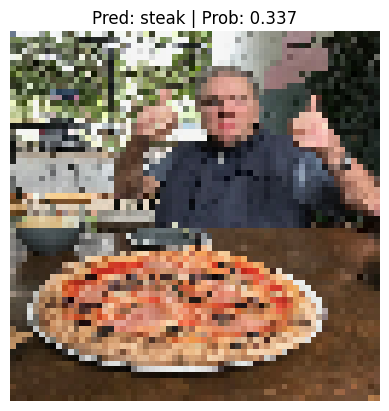

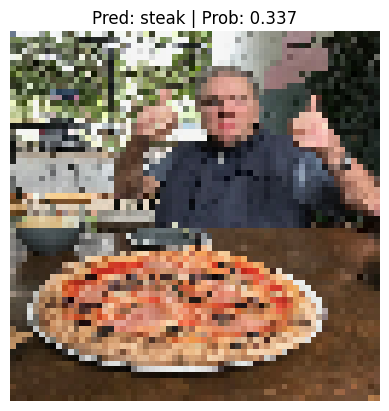

In [21]:
pred_and_plot_image(model, custom_image_path, class_names, custom_image_transform, device)